In [2]:
import sys
import os
import PIL
import numpy as np
from numpy.linalg import norm
from math import *
from scipy import ndimage
from scipy import misc
import skimage

%matplotlib inline 
import matplotlib.pyplot as plt


In [5]:
def createRgbToYCrgCb():
    Y = np.array([1,1,1])
    Crg = np.array([1,-1,0])

    Y = Y / np.linalg.norm(Y)
    Crg = Crg / np.linalg.norm(Crg)
    Cb = np.cross(Crg, Y)
    Cb = Cb / np.linalg.norm(Cb)
    print "Y", Y
    print "Crg", Crg
    print "Cb", Cb
    print Y.dot (Crg)
    print Crg.dot (Cb)
    print Y.dot (Cb)
    return np.array([Y, Crg, Cb])

rgbToYCrgCb = createRgbToYCrgCb()
print 'rgbToYCrgCb', rgbToYCrgCb
print 'yCrgCbToRgb', np.linalg.inv(rgbToYCrgCb)

Y [ 0.57735027  0.57735027  0.57735027]
Crg [ 0.70710678 -0.70710678  0.        ]
Cb [-0.40824829 -0.40824829  0.81649658]
0.0
0.0
0.0
rgbToYCrgCb [[ 0.57735027  0.57735027  0.57735027]
 [ 0.70710678 -0.70710678  0.        ]
 [-0.40824829 -0.40824829  0.81649658]]
yCrgCbToRgb [[  5.77350269e-01   7.07106781e-01  -4.08248290e-01]
 [  5.77350269e-01  -7.07106781e-01  -4.08248290e-01]
 [  5.77350269e-01   9.06493304e-17   8.16496581e-01]]


In [4]:
def createRgbToYCorangeCblueish():
    Y = np.array([1,1,1])
    # blue is always -1-b because we want to make sure gray gives 0
    # b = 0.647 # this is for orange
    b = 1.0 # this is for yellow    
    Corange = np.array([1.0,b,-1-b])

    Y = Y / np.linalg.norm(Y)
    Corange = Corange / np.linalg.norm(Corange)
    Cblueish = np.cross(Corange, Y)
    Cblueish = Cblueish / np.linalg.norm(Cblueish)
    print "Y", Y
    print "Corange", Corange
    print "Cblueish", Cblueish
    print Y.dot (Corange)
    print Corange.dot (Cblueish)
    print Y.dot (Cblueish)
    return np.array([Y, Cblueish, Corange])

rgbToYCorangeCblueish = createRgbToYCorangeCblueish()
print 'rgbToYCorangeCblueish', rgbToYCorangeCblueish
print 'rgbToYCorangeCblueish * white =', np.dot(rgbToYCorangeCblueish, [1,1,1])
print 'rgbToYCorangeCblueish * orange =', np.dot(rgbToYCorangeCblueish, [1,0.647,0])

print 'YCorangeCblueishToRgb', np.linalg.inv(rgbToYCorangeCblueish)

Y [ 0.57735027  0.57735027  0.57735027]
Corange [ 0.40824829  0.40824829 -0.81649658]
Cblueish [ 0.70710678 -0.70710678  0.        ]
0.0
0.0
0.0
rgbToYCorangeCblueish [[ 0.57735027  0.57735027  0.57735027]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.40824829  0.40824829 -0.81649658]]
rgbToYCorangeCblueish * white = [ 1.73205081  0.          0.        ]
rgbToYCorangeCblueish * orange = [ 0.95089589  0.24960869  0.67238493]
YCorangeCblueishToRgb [[  5.77350269e-01   7.07106781e-01   4.08248290e-01]
 [  5.77350269e-01  -7.07106781e-01   4.08248290e-01]
 [  5.77350269e-01   9.06493304e-17  -8.16496581e-01]]


In [7]:
def convert_rgbToYCxCy(image, rgbToCxCy):
    image = image[:,:,0:3] # get rid of any alpha channel
    float_image = skimage.util.dtype.img_as_float(image)
    return np.inner(float_image, rgbToCxCy)

def convert_yCxCyToRgb(image, rgbToCxCy):
    float_image = np.inner(image, np.linalg.inv(rgbToCxCy))
    return float_image

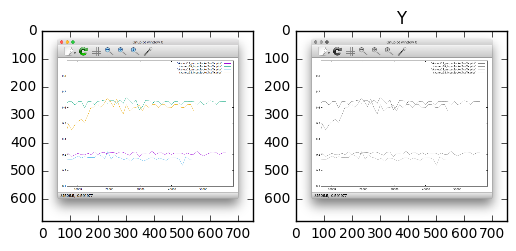

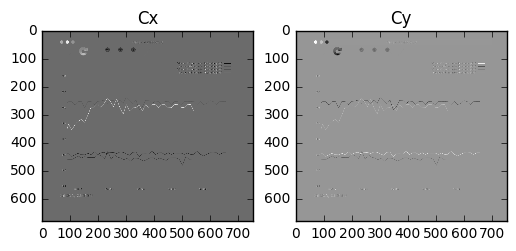

In [8]:
image = ndimage.io.imread('../DaltonLensTests/skanect_plot.png')
#image = ndimage.io.imread('../DaltonLensTests/skanect_plot_curves_only.png')
float_image = skimage.util.dtype.img_as_float(image[:,:,0:3])

# rgbToCxCy = rgbToYCrgCb
rgbToCxCy = rgbToYCorangeCblueish

yCxCyImage = convert_rgbToYCxCy(image, rgbToCxCy)

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('Y')
plt.imshow(yCxCyImage[:,:,0], cmap='gray')

plt.figure()
plt.subplot(1,2,1)
plt.title('Cx')
plt.imshow(yCxCyImage[:,:,1], cmap='gray')
plt.subplot(1,2,2)
plt.title('Cy')
plt.imshow(yCxCyImage[:,:,2], cmap='gray')


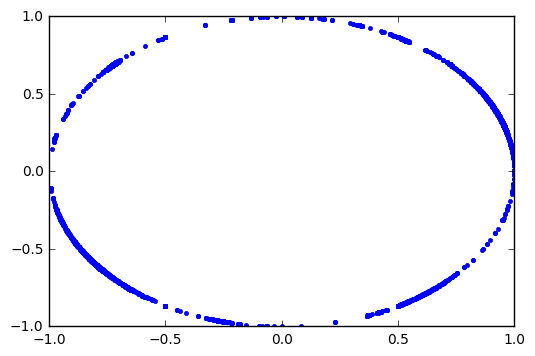

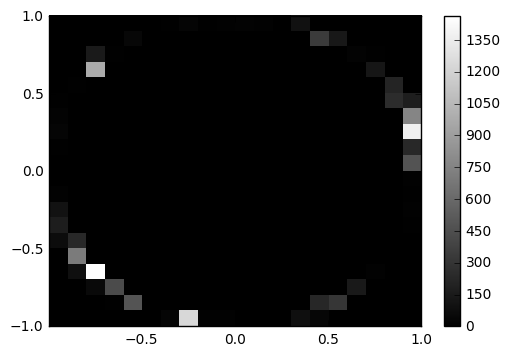

In [9]:
cxCyPoints = np.reshape(yCxCyImage, (-1,3))
nonGrayPoints = np.logical_or(abs(cxCyPoints[:,1]>0.01), (abs(cxCyPoints[:,2])>0.01))
cxCyPoints = cxCyPoints[nonGrayPoints, :]

cxCyNorm = norm(cxCyPoints[:,1:3],axis=1) # shape is (#points,normOfCxCy)
cxCyPoints = cxCyPoints / cxCyNorm[:,np.newaxis]

plt.plot (cxCyPoints[:,1], cxCyPoints[:,2], '.')
plt.figure()

plt.hist2d (cxCyPoints[:,1], cxCyPoints[:,2], bins=20, cmap="gray");
plt.colorbar()

-0.229662998453
1.11965296362
transformedYCxCy[91,54] [ 1.29734002  0.          0.        ]
yCxCyImage[91,54] [ 1.29734002  0.          0.        ]
sum 2.24705882353
sum 2.24705882353
norm 1.29734001665
norm 1.29734001665
float_image 27,37 [ 0.99215686  0.99215686  0.99215686]
transformedRgb 27,37 [ 0.99215686  0.99215686  0.99215686]

float_image 91,54 [ 0.74901961  0.74901961  0.74901961]
transformedRgb 91,54 [ 0.74901961  0.74901961  0.74901961]


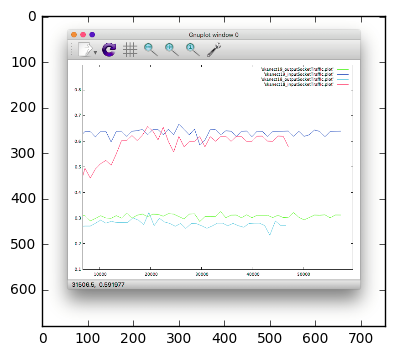

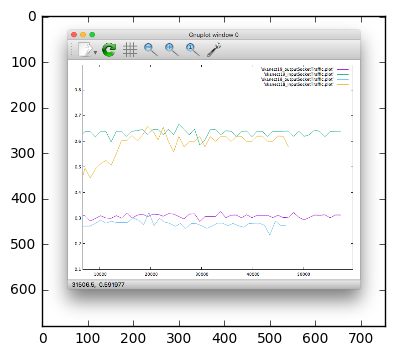

In [10]:
def switchCxAndCy(yCxCyImage_in):
    yCxCyImage = yCxCyImage_in.copy()
    tmp = yCxCyImage[:,:,1].copy()
    yCxCyImage[:,:,1] = yCxCyImage[:,:,2].copy()
    yCxCyImage[:,:,2] = tmp # FIXME: could be -tmp
    return yCxCyImage

transformedYCxCy = switchCxAndCy(yCxCyImage)
transformedRgb = convert_yCxCyToRgb(transformedYCxCy, rgbToCxCy)
print np.min(transformedRgb)
print np.max(transformedRgb)

transformedRgb = np.clip(transformedRgb, 0.0, 1.0)

print 'transformedYCxCy[91,54]', transformedYCxCy[91,54]
print 'yCxCyImage[91,54]', yCxCyImage[91,54]

print 'sum', np.sum(float_image[91,54])
print 'sum', np.sum(transformedRgb[91,54])

print 'norm', norm(float_image[91,54])
print 'norm', norm(transformedRgb[91,54])

print 'float_image 27,37', float_image[37,27]
print 'transformedRgb 27,37', transformedRgb[37,27]
print
print 'float_image 91,54', float_image[91,54]
print 'transformedRgb 91,54', transformedRgb[91,54]


misc.imsave('../DaltonLensTests/skanect_plot_curves_only_transformed.png', transformedRgb)

plt.imshow(transformedRgb)
plt.figure()
plt.imshow(image)


 normalizedCxCyRef [-0.28342888 -0.95899326]
weights (681, 754)
weights 91,54 1.52587890625e-05


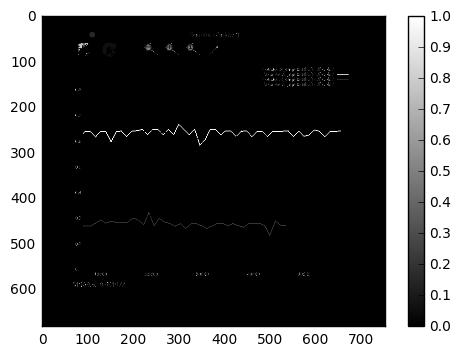

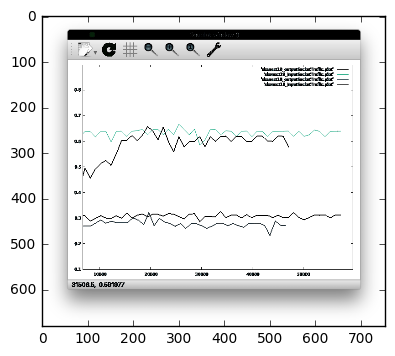

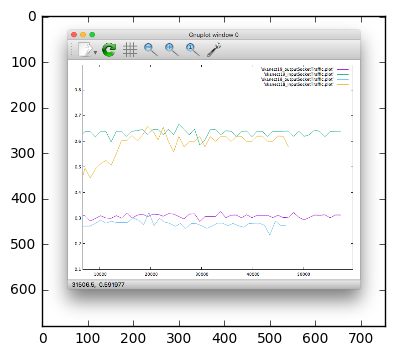

In [12]:
#refYCxCyPixel = yCxCyImage[91,54]
#refYCxCyPixel = yCxCyImage[37,27]
#refYCxCyPixel = yCxCyImage[225,50]
#refYCxCyPixel = yCxCyImage[237,60]

refYCxCyPixel = yCxCyImage[254,168]
#refYCxCyPixel = yCxCyImage[270,190]

refCxCyPixel = refYCxCyPixel[1:3]
normalizedCxCyRef = refCxCyPixel / norm(refCxCyPixel)
print 'normalizedCxCyRef', normalizedCxCyRef

cxCyImage = yCxCyImage[:,:,1:3]
cxCyNorm = norm(cxCyImage,axis=2) # shape is (rows,cols) -> normOfCxCy
grayPoints = (cxCyNorm<0.001)*1.0
cxCyNorm = cxCyNorm + grayPoints
normalizedCxCyImage = cxCyImage / cxCyNorm[:,:,np.newaxis]

weights = np.inner(normalizedCxCyImage, normalizedCxCyRef)
weights = weights*0.5 + 0.5 # go from -1,1 to 0,1
weights = np.power(weights, 16)

print 'weights', weights.shape

print 'weights 91,54', weights[91,54]

plt.imshow(weights, cmap="gray")
plt.colorbar()

weights = np.maximum(weights, grayPoints)

plt.figure()
plt.imshow(float_image*weights[:,:,np.newaxis])

misc.imsave('../DaltonLensTests/skanect_plot_highlight2.png', 
            np.clip(float_image*weights[:,:,np.newaxis], 0, 1))

plt.figure()
plt.imshow(float_image)

# plt.imshow(normalizedYCxCyImage)
